In [0]:
%load_ext autoreload
%autoreload 2

from agents import banditagents
from environments import bandits

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

In [89]:
bandit_config = {}
bandit_config['payoffs'] = [0.4, 0.6]
bandit_config['sampling_distribution'] = 'uniform'

demonstrator_config = {}
demonstrator_config['num_iterations'] = 1000 #160
demonstrator_config['num_initial_rounds'] = 100
demonstrator_config['decay'] = None
demonstrator_config['epsilon'] = None
demonstrator_config['optimistic'] = None
demonstrator_config['solver'] = 'greedy'
demonstrator_config['random_agent'] = False
demonstrator_config['social_agent'] = False

learner_config = {}
learner_config['num_iterations'] = demonstrator_config['num_iterations']
learner_config['num_initial_rounds'] = demonstrator_config['num_initial_rounds']
learner_config['decay'] = demonstrator_config['decay']
learner_config['epsilon'] = demonstrator_config['epsilon']
learner_config['optimistic'] = demonstrator_config['optimistic']
learner_config['solver'] = demonstrator_config['solver'] 
learner_config['random_agent'] = demonstrator_config['random_agent']
learner_config['social_agent'] = True
learner_config['observe_simultaneously'] = False
learner_config['observe_action_only'] = True
learner_config['observe_current_iteration'] = True

num_episodes = 50
solvers = ['greedy']
env = bandits.Bandit(bandit_config)

demonstrator_all_rewards = np.empty(shape=(len(solvers),num_episodes, demonstrator_config['num_iterations']),dtype=float)
demonstrator_all_actions = np.empty(shape=(len(solvers),num_episodes, demonstrator_config['num_iterations']),dtype=float)
demonstrator_best_arm_estimate_proportions = np.arange(env.num_arms)

learner_all_rewards = np.empty(shape=(len(solvers),num_episodes, learner_config['num_iterations']),dtype=float)
learner_all_actions = np.empty(shape=(len(solvers),num_episodes, learner_config['num_iterations']),dtype=float)
learner_best_arm_estimate_proportions = np.arange(env.num_arms)

for i, solver in enumerate(solvers):
    for j in range(num_episodes):
        demonstrator = banditagents.GreedyAgent(demonstrator_config)
        # run greedy explore
        demonstrator(env)
        demonstrator_all_rewards[i,j,:] = demonstrator.reward_history
        demonstrator_all_actions[i,j,:] = demonstrator.arm_id_history


        learner = banditagents.GreedyAgent(learner_config)
        # run greedy explore
        init_rewards, agent2_rewards = learner(env, demonstrator)
        learner_all_rewards[i,j,:] = learner.reward_history
        learner_all_actions[i,j,:] = learner.arm_id_history
        
        learner_best_arm_estimate_proportions[learner.best_arm_id]=+1
        demonstrator_best_arm_estimate_proportions[demonstrator.best_arm_id]=+1

demonstrator_best_arm_estimate_proportions = demonstrator_best_arm_estimate_proportions/np.sum(demonstrator_best_arm_estimate_proportions)
learner_best_arm_estimate_proportions = learner_best_arm_estimate_proportions/np.sum(learner_best_arm_estimate_proportions)

In [90]:

learner_best_arm_estimate_proportions

array([0., 1.])

In [91]:
demonstrator_best_arm_estimate_proportions

array([0.5, 0.5])

In [92]:
learner_all_actions[0,-1,:]




array([2., 0., 0., 0., 0., 1., 1., 2., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 2., 2., 2., 0., 1., 1., 1., 0., 1., 1., 2., 1., 1., 2., 0., 0.,
       0., 0., 2., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 2., 0.,
       0., 2., 2., 1., 0., 2., 2., 2., 2., 1., 2., 2., 0., 0., 1., 0., 1.,
       0., 1., 2., 2., 1., 1., 2., 2., 0., 2., 2., 0., 2., 1., 1., 2., 0.,
       1., 2., 0., 1., 2., 2., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [93]:
demonstrator_all_actions[0,-1,:]

array([1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [94]:
learner.best_arm_id

1

In [95]:
learner.best_arm_mean_payoff

0.56

In [96]:
init_rewards

{2: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 0: [1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1],
 1: [0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0]}

In [97]:
agent2_rewards

{1: [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
 0: [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1]}

In [98]:
cir = learner.combine_rewards(init_rewards, agent2_rewards)
cir

{0: [1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1],
 1: [0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1],
 2: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]}

In [99]:
init_mean_payoffs = {} # average payoff using initial rewards
for key, value in cir.items():
    init_mean_payoffs[key] = np.mean(value) 
best_arm_id = max(init_mean_payoffs, key=init_mean_payoffs.get)
best_arm_id

1

In [100]:
# finding: if learner only observed demsontrator choose its best arms and has poor estimates of other arms may incorrectly choose suboptimal arm
    # this is because with less samples you may over estimate a bad arm (always get reward of 1)
    # and because unless the optimal arm's prob is 1, then payoff estimate will be less than 1
    # so it is helpful to either explore on your own for the purposes of estimating other payoffs better 
    # or observe the demonstrator explore (but the more expert they are the less likely this will happen)

# thought: strategy could be - learner assumes demonstrator is better at the task - and purposely observes actions different from it (easy to do in best arm case)

# how much do we sample agent2? (treat as another arm or sample half the time?)

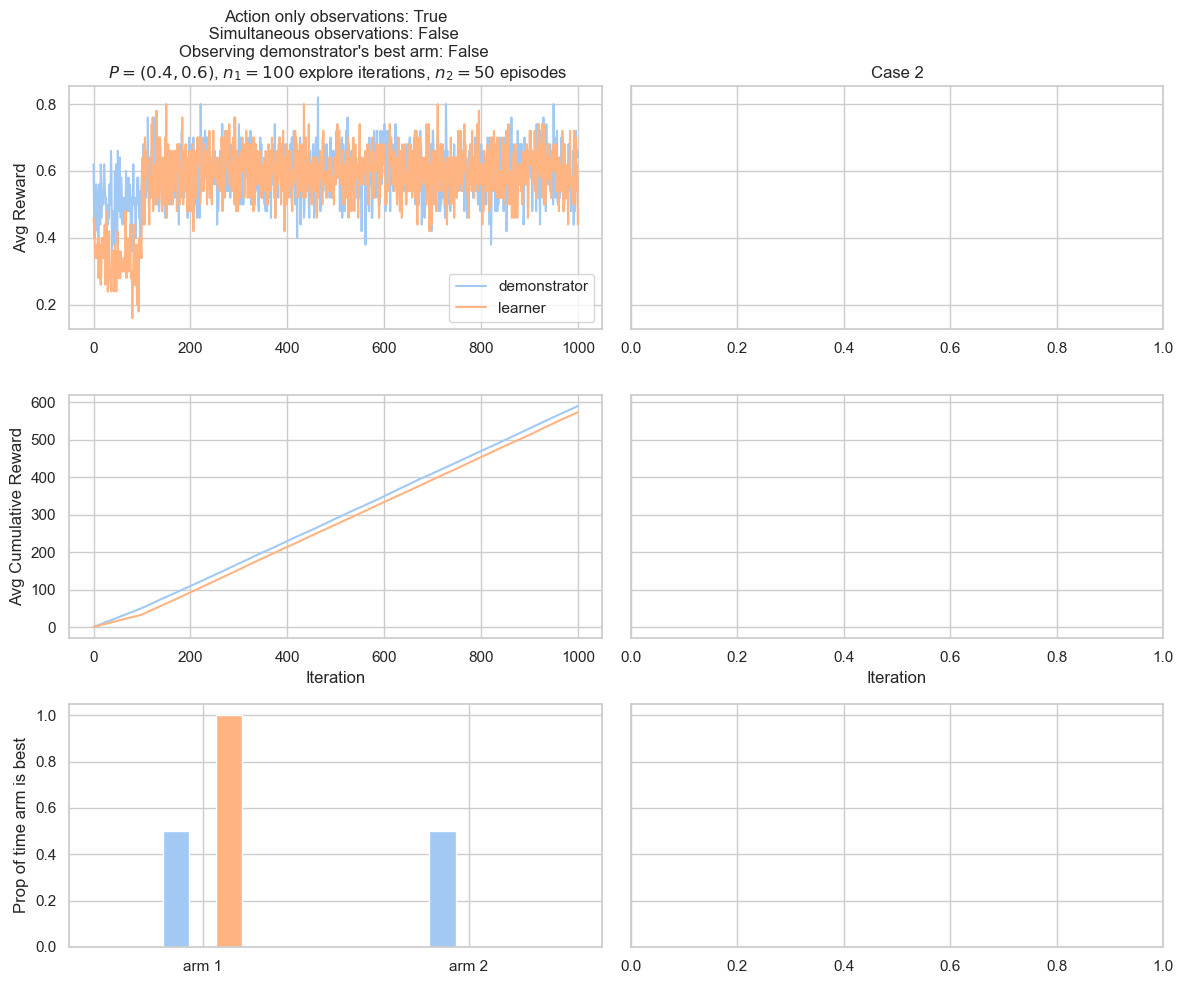

In [150]:
demonstrator_mean_reward_per_iteration = np.mean(demonstrator_all_rewards, axis=1)
demonstrator_sd_reward_per_iteration = np.mean(demonstrator_all_rewards, axis=1)
demonstrator_mean_cumulative_reward = np.cumsum(demonstrator_mean_reward_per_iteration,axis=1)
demonstrator_mean_cumulative_reward_after_exploration = np.cumsum(demonstrator_mean_reward_per_iteration[:,demonstrator_config['num_initial_rounds']:],axis=1)

learner_mean_reward_per_iteration = np.mean(learner_all_rewards, axis=1)
learner_sd_reward_per_iteration = np.mean(learner_all_rewards, axis=1)
learner_mean_cumulative_reward = np.cumsum(learner_mean_reward_per_iteration,axis=1)
learner_mean_cumulative_reward_after_exploration = np.cumsum(learner_mean_reward_per_iteration[:,demonstrator_config['num_initial_rounds']:],axis=1)

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(12,10), sharex=False, sharey='row')

for i, solver in enumerate(solvers):
    axes[0,0].plot(demonstrator_mean_reward_per_iteration[i], label='demonstrator')
    axes[0,0].plot(learner_mean_reward_per_iteration[i], label='learner')
    
    axes[1,0].plot(demonstrator_mean_cumulative_reward[i], label='demonstrator')
    axes[1,0].plot(learner_mean_cumulative_reward[i], label='learner')
    
    #axes[2,0].plot(demonstrator_mean_cumulative_reward_after_exploration[i], label='demonstrator')
    #axes[2,0].plot(learner_mean_cumulative_reward_after_exploration[i], label='learner')

    width = 0.1       
    axes[2,0].bar(env.arm_ids+1-width, demonstrator_best_arm_estimate_proportions, width, label='demonstrator')
    axes[2,0].bar(env.arm_ids + width, learner_best_arm_estimate_proportions, width, label='learner')
    axes[2,0].set_xlim([0.5,2.5])
    axes[2,0].set_xticks([1, 2])
    axes[2,0].set_xticklabels(['arm 1', 'arm 2'])
    
    
axes[0,0].set_ylabel('Avg Reward')
axes[1,0].set_ylabel('Avg Cumulative Reward')
#axes[2,0].set_ylabel('Avg Cumulative Reward After Exp')
axes[2,0].set_ylabel('Prop of time arm is best')

axes[1,0].set_xlabel('Iteration')
axes[1,1].set_xlabel('Iteration')
axes[0,0].set_title("Action only observations: {}\n Simultaneous observations: {}  \nObserving demonstrator's best arm: {} \n $P=({},{})$, $n_1={}$ explore iterations, $n_2={}$ episodes".format(
    learner_config['observe_action_only'],
    learner_config['observe_simultaneously'],
    not learner_config['observe_current_iteration'],
    bandit_config['payoffs'][0], 
    bandit_config['payoffs'][1],
    demonstrator_config['num_initial_rounds'], 
    num_episodes, 
    ))
axes[0,1].set_title('Case 2')
axes[0,0].legend()
#handles, labels = axes[1,0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper left')
plt.tight_layout()
plt.show()

# try different learners
1. observe simultaneously
2. observe as choice 
3. observe action only 
4. observe action and reward
5. change arm probabilities
6. what to observe - best action or current action
7. try two agents learning together

# visualizations
1. distribution of time choosing each arm
2. distribution of samples for each arm

# for tomorrow: 
1. psudo code on mardown
2. explanation of how it works
3. what I ran
4. outcomes/plots - different cases
5. other findings
6. next steps?
